In [1]:
# import package
from bayes_opt import BayesianOptimization
from bayes_opt.observer import JSONLogger # for saving 
from bayes_opt.event import Events # for saving
from bayes_opt.util import load_logs # for loading


# project specific
import numpy as np
import matplotlib.pyplot as plt
import os
#import fitpatterns_autolab_simple as fitpatterns
import fitpatterns_opt_drift as fitpatterns
import itertools
#from load_module_prob import load_module
import load_models as load_model
import plotting_functions as plotting
import load_models as models

#### parameter settings
# when plotting, set data_id = 0 and N = 0 in set_parameter_prob() under fitpatterns_opt_drift.py
# when running Bayesian Optimization, set N = 1 in set_parameter_prob() under fitpatterns_opt_drift.py

In [2]:
# Figure settings
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.5  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
plt.subplots_adjust(left=0.125, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
    
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']


<Figure size 432x288 with 0 Axes>

In [3]:
# Figure settings
def set_figure(SMALL_SIZE,MEDIUM_SIZE):
    #left = 0.125  # the left side of the subplots of the figure
    #right = 0.9   # the right side of the subplots of the figure
    #bottom = 0.2  # the bottom of the subplots of the figure
    #top = 0.9     # the top of the subplots of the figure
    #wspace = 0.5  # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
    #hspace = 0.5  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
    #SMALL_SIZE = 14
    #MEDIUM_SIZE = 16
    #BIGGER_SIZE = 16
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    #colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']
    return plt

#### CMR fit to K02 dataset

{'target': -0.20953724517081426, 'params': {'k': 5.380182482069175, 'gamma_fc': 0.4024001271645564, 'beta_enc': 0.7887626184661226, 'phi_d': 2.738934338758688, 'epsilon_d': 2.723826426356652, 'phi_s': 4.661547054594787, 'beta_rec': 0.49104864172027485}}


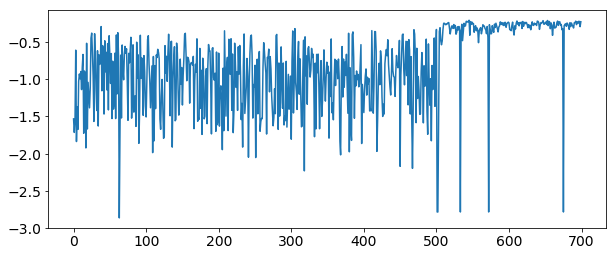

New optimizer is now aware of 700 points.


In [4]:
optimizer = load_model.load_vanilla()  
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02.json"])

print(optimizer)
print(optimizer.max)

plt.rcParams['figure.figsize'] = (10,4)
y_obs = np.array([res["target"] for res in optimizer.res])
plt.plot(y_obs)
plt.show()

#plt.rcParams['figure.figsize'] = (20,10)
param = optimizer.max['params']
print("New optimizer is now aware of {} points.".format(len(optimizer.space)))
#RMSE = fitpatterns.obj_func_simple_model7(param['beta_enc'],param['beta_rec'],param['gamma_fc'],param['gamma_cf'],param['s_cf'],param['phi_s'],param['phi_d'],param['epsilon_d'],param['k_intra'])
   

### Figure 1. the effect of gamma_fc
Fit CMR to Kahana 02: python3 script_fitCMRprob.py (set data_id = 0 in fitpatterns_opt_drift.py)

In [5]:
optimizer = load_model.load_vanilla()  
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02.json"])
param = optimizer.max['params']
print(optimizer.max['params'])

N, ll, lag_examine, data_id = fitpatterns.set_parameter_prob()
CMR_sp  = fitpatterns.obj_func_prob(param['beta_enc'],param['beta_rec'],0,param['phi_s'],param['phi_d'],param['epsilon_d'],param['k'])
CMR_crp0 = fitpatterns.get_crp(CMR_sp,4,ll)
CMR_sp  = fitpatterns.obj_func_prob(param['beta_enc'],param['beta_rec'],1,param['phi_s'],param['phi_d'],param['epsilon_d'],param['k'])
CMR_crp1 = fitpatterns.get_crp(CMR_sp,4,ll)

{'k': 5.380182482069175, 'gamma_fc': 0.4024001271645564, 'beta_enc': 0.7887626184661226, 'phi_d': 2.738934338758688, 'epsilon_d': 2.723826426356652, 'phi_s': 4.661547054594787, 'beta_rec': 0.49104864172027485}


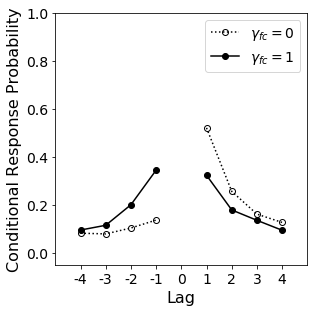

In [6]:
plt.rcParams['figure.figsize'] = (5,5)
plt.plot(range(4), CMR_crp0[0:4], ':ok',mfc='none')
plt.plot(range(4), CMR_crp1[0:4], '-ok')
plt.legend(['$\gamma_{fc}=0$','$\gamma_{fc}=1$'])
plt.plot([5,6,7,8], CMR_crp0[5:9], ':ok',mfc='none')
plt.plot([5,6,7,8], CMR_crp1[5:9], '-ok')
plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.axis([-1,9,-0.05,1])
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
plt.savefig('./Figs/figure1_gamma.png') 
plt.show()

### Figure 2. CMR fit to K02 dataset
python3 script_fitCMRprob.py (set data_id = 0 in fitpatterns_opt_drift.py)

In [7]:
# fit to all subjects
optimizer = load_model.load_vanilla()  
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02.json"])
param = optimizer.max['params']
print(optimizer.max['params'])

{'k': 5.380182482069175, 'gamma_fc': 0.4024001271645564, 'beta_enc': 0.7887626184661226, 'phi_d': 2.738934338758688, 'epsilon_d': 2.723826426356652, 'phi_s': 4.661547054594787, 'beta_rec': 0.49104864172027485}


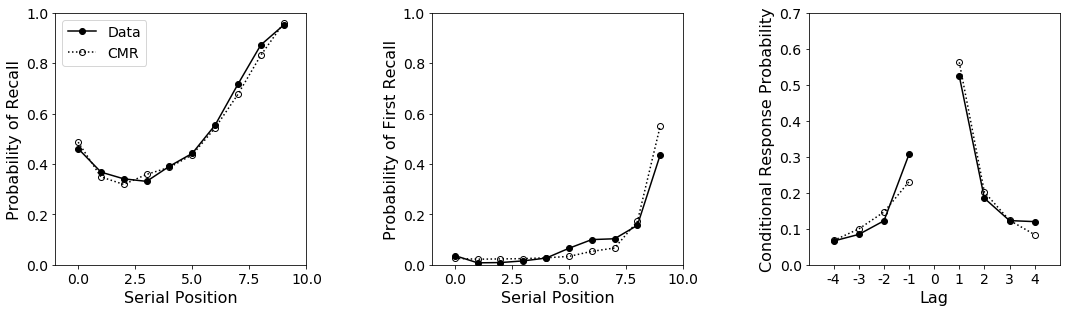

In [8]:
N, ll, lag_examine, data_id = fitpatterns.set_parameter_prob()
CMR_sp  = fitpatterns.obj_func_prob(param['beta_enc'],param['beta_rec'],param['gamma_fc'],param['phi_s'],param['phi_d'],param['epsilon_d'],param['k'])
CMR_spc,CMR_pfr = fitpatterns.get_spc_pfr(CMR_sp,ll)
CMR_crp = fitpatterns.get_crp(CMR_sp,4,ll)
data_spc, data_pfr, data_crp = fitpatterns.load_patterns(data_id)

plotting.plot_behav(data_spc,data_pfr,data_crp,CMR_spc,CMR_pfr,CMR_crp,ll,'figure2_fitK02.png') 

### Appendix result I

#### Bottom half subjects

In [9]:
# fit to bottom half subjects
optimizer = load_model.load_vanilla()  
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_bottom.json"])
param = optimizer.max['params']
print(optimizer.max['params'])

{'k': 4.40574248709815, 'gamma_fc': 0.4456103768016706, 'beta_enc': 0.7874501572877763, 'phi_d': 2.5664805632735734, 'epsilon_d': 2.1130070142836126, 'phi_s': 3.40669921994143, 'beta_rec': 0.5441212619621024}


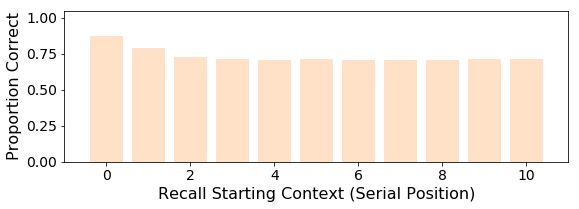

In [10]:
### 
# Result 1: Starting from the beginning gives best recall
###
plt.rcParams['figure.figsize'] = (10,3)
performance1 = []
ll = 10
for pos in range(ll+1):
    optimizer = load_model.load_reminder()
    load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_bottom_pos"+str(pos)+".json"]) # phi_s = 0
    param = optimizer.max['params']
    performance1.append(optimizer.max['target']/ll) 
#plt.axhline(y=1,linestyle='--',color='r',xmin=0,xmax=10,alpha=0.8)
plt.bar(range(ll+1),performance1,color='peachpuff',alpha=0.8)
plt.axis([-1,11,0,1.05])
plt.xlabel('Recall Starting Context (Serial Position)')
plt.ylabel('Proportion Correct')
set_figure(14,16)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
plt.savefig('./Figs/figure5A_startpos_bottom.png') 
plt.show()

In [11]:
# if start from the beginning
optimizer = load_model.load_reminder()
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_bottom_pos"+str(0)+".json"]) # phi_s = 0
param = optimizer.max['params']
print(optimizer.max['params'])

{'gamma_fc': 0.0045079613133877094, 'cue_position': 0.0, 'beta_rec': 0.9833418152999969, 'beta_enc': 0.9993357312781752}


In [12]:
# if start from the end
optimizer = load_model.load_reminder()
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_bottom_betaenc60_pos10.json"]) # phi_s = 0
print(optimizer.max['params'])

{'gamma_fc': 0.9917014110183976, 'cue_position': 10.0, 'beta_rec': 1.0, 'beta_enc': 0.6}


#### Top half subjects

In [13]:
# fit to top half subjects
optimizer = load_model.load_vanilla()  
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_top.json"])
param = optimizer.max['params']
print(optimizer.max['params'])

{'k': 5.4694949582292365, 'gamma_fc': 0.34885042511590303, 'beta_enc': 0.7454510707820611, 'phi_d': 2.746914279227626, 'epsilon_d': 3.007583053727949, 'phi_s': 4.609259553189038, 'beta_rec': 0.46695698125422086}


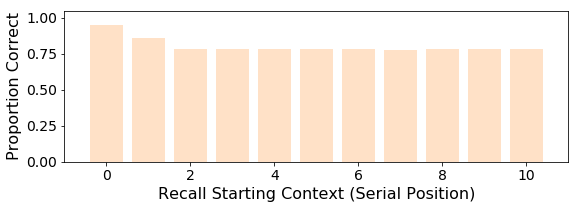

In [14]:
### 
# Result 1: Starting from the beginning gives best recall
###
plt.rcParams['figure.figsize'] = (10,3)
performance1 = []
ll = 10
for pos in range(ll+1):
    optimizer = load_model.load_reminder()
    load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_top_pos"+str(pos)+".json"]) # phi_s = 0
    param = optimizer.max['params']
    performance1.append(optimizer.max['target']/ll) 
#plt.axhline(y=1,linestyle='--',color='r',xmin=0,xmax=10,alpha=0.8)
plt.bar(range(ll+1),performance1,color='peachpuff',alpha=0.8)
plt.axis([-1,11,0,1.05])
plt.xlabel('Recall Starting Context (Serial Position)')
plt.ylabel('Proportion Correct')
set_figure(14,16)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
plt.savefig('./Figs/figure5A_startpos_top.png') 
plt.show()

In [15]:
# if start from the beginning
optimizer = load_model.load_reminder()
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_top_pos"+str(0)+".json"]) # phi_s = 0
param = optimizer.max['params']
print(optimizer.max['params'])

{'gamma_fc': 0.007144539051575416, 'cue_position': 0.0, 'beta_rec': 0.9835635630553189, 'beta_enc': 0.9989175096755485}


In [16]:
# if start from the end
optimizer = load_model.load_reminder()
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_top_betaenc60_pos10.json"]) # phi_s = 0
print(optimizer.max['params'])

{'gamma_fc': 0.9824909449748953, 'cue_position': 10.0, 'beta_rec': 0.9752223424373121, 'beta_enc': 0.6}


### Appendix Result II. CMR2 variant

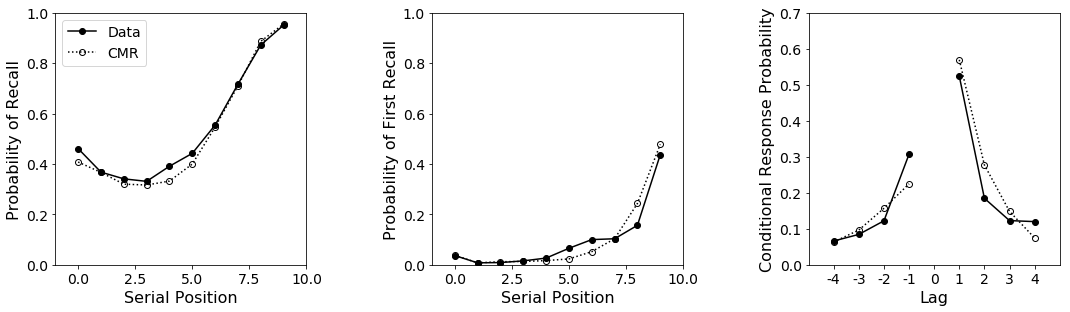

In [17]:
# this is the full version of CMR2 that captures intrusions and uses primacy (this can take several minutes - CMR2 is slower with the LCA retrieval rule)
ll=10
beta_enc = 0.519769
beta_rec = 0.627801
gamma_fc = 0.425064
cue_position = ll
CMR_sp,data_sp,acc  = fitpatterns.obj_func_fullCMR2(beta_enc,beta_rec,gamma_fc,cue_position)
CMR_spc,CMR_pfr = fitpatterns.get_spc_pfr(CMR_sp,ll)
CMR_crp = fitpatterns.get_crp(CMR_sp,4,ll)
data_spc,data_pfr = fitpatterns.get_spc_pfr(data_sp,ll)
data_crp = fitpatterns.get_crp(data_sp,4,ll)
plotting.plot_behav(data_spc,data_pfr,data_crp,CMR_spc,CMR_pfr,CMR_crp,ll,'figureR_fitK02_fullCMR2.png') 

In [18]:
data_sp_flatten = [item for sublist in data_sp for item in sublist]
CMR_sp_flatten = [item for sublist in CMR_sp for item in sublist]
intrusion_data = [1 for x in data_sp_flatten if x<-90]
intrusion_model = [1 for x in CMR_sp_flatten if x<-90]
print("Intrusion rate during recall is {} in the data.".format(len(intrusion_data)/len(data_sp_flatten)))
print("Intrusion rate during recall is {} in the model.".format(len(intrusion_model)/len(CMR_sp_flatten)))

Intrusion rate during recall is 0.061444217560794503 in the data.
Intrusion rate during recall is 0.06403162055335969 in the model.


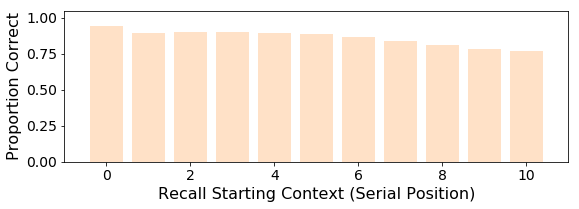

In [19]:
plt.rcParams['figure.figsize'] = (10,3)
performance1 = []
ll = 10
for pos in range(ll+1):
    optimizer = load_model.load_reminder()
    load_logs(optimizer, logs=["./output/logs0820_fitCMR2_K02Behav_poi05_pos"+str(pos)+".json"]) # phi_s = 0
    param = optimizer.max['params']
    performance1.append(optimizer.max['target']/ll) 
#plt.axhline(y=1,linestyle='--',color='r',xmin=0,xmax=10,alpha=0.8)
plt.bar(range(ll+1),performance1,color='peachpuff',alpha=0.8)
plt.axis([-1,11,0,1.05])
plt.xlabel('Recall Starting Context (Serial Position)')
plt.ylabel('Proportion Correct')
set_figure(14,16)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
plt.savefig('Figs/figureR_fullCMR2_startpos.png') 
plt.show()

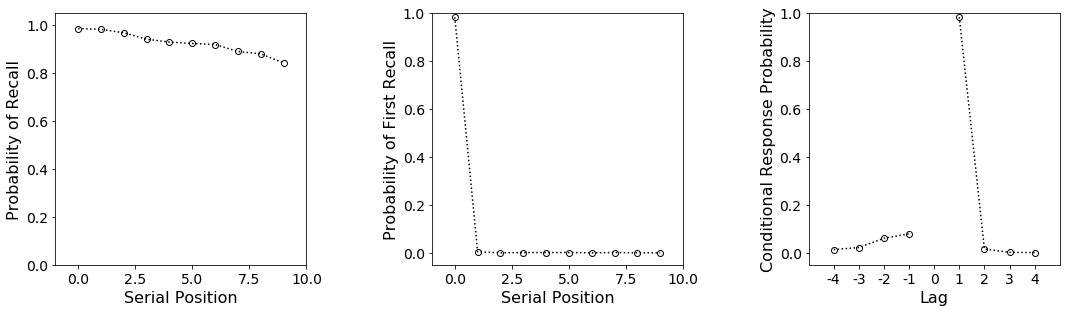

In [20]:
optimizer = load_model.load_reminder()
load_logs(optimizer, logs=["./output/logs0820_fitCMR2_K02Behav_poi05_pos0.json"]) # phi_s = 0
param = optimizer.max['params']
N, ll, lag_examine, data_id = fitpatterns.set_parameter_prob()
CMR_sp,_,acc = fitpatterns.obj_func_fullCMR2(param['beta_enc'],param['beta_rec'],param['gamma_fc'],0)
CMR_spc,CMR_pfr = fitpatterns.get_spc_pfr(CMR_sp,ll)
CMR_crp = fitpatterns.get_crp(CMR_sp,4,ll)
data_spc, data_pfr, data_crp = fitpatterns.load_patterns(data_id)
plotting.plot_simulations(CMR_spc,CMR_pfr,CMR_crp,ll,'figureR_fullCMR2_optimalpolicy.png') 

In [21]:
# optimal set of the parameters
optimizer.max

{'params': {'beta_enc': 0.9360875274509668,
  'beta_rec': 0.8772404998425293,
  'cue_position': 0.0,
  'gamma_fc': 0.16668511112234596},
 'target': 9.415555555555555}

### Figure 3 & 5. Optimal CMR by starting recall position - A rational account of Primacy and Forward Asymmetry
python3 script_reminder.py --pos i (i ranges from 0 to 10)

In [22]:
### 
# Result 1: Starting from the beginning gives best recall
###
plt.rcParams['figure.figsize'] = (10,3)
performance1 = []
ll = 10
for pos in range(ll+1):
    optimizer = load_model.load_reminder()
    load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_pos"+str(pos)+".json"]) # phi_s = 0
    param = optimizer.max['params']
    performance1.append(optimizer.max['target']/ll) 
print(performance1)

[0.9469111111111113, 0.8557777777777777, 0.7631111111111112, 0.7609777777777778, 0.7641999999999999, 0.7640444444444445, 0.7615333333333334, 0.7630222222222223, 0.7627111111111111, 0.7624888888888888, 0.7612666666666666]


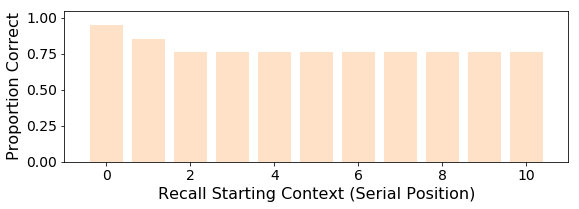

In [23]:
### 
# Result 1: Starting from the beginning gives best recall
###
plt.rcParams['figure.figsize'] = (10,3)
performance1 = []
ll = 10
for pos in range(ll+1):
    optimizer = load_model.load_reminder()
    load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_pos"+str(pos)+".json"]) # phi_s = 0
    param = optimizer.max['params']
    performance1.append(optimizer.max['target']/ll) 
#plt.axhline(y=1,linestyle='--',color='r',xmin=0,xmax=10,alpha=0.8)
plt.bar(range(ll+1),performance1,color='peachpuff',alpha=0.8)
plt.axis([-1,11,0,1.05])
plt.xlabel('Recall Starting Context (Serial Position)')
plt.ylabel('Proportion Correct')
set_figure(14,16)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
plt.savefig('./Figs/figure5A_startpos.png') 
plt.show()

In [24]:
optimizer = load_model.load_reminder()
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_pos0.json"]) # phi_s = 0
param = optimizer.max['params']
print(param)

{'gamma_fc': 0.0011989632026803143, 'cue_position': 0.0, 'beta_rec': 0.991138170039493, 'beta_enc': 0.9968786067897634}


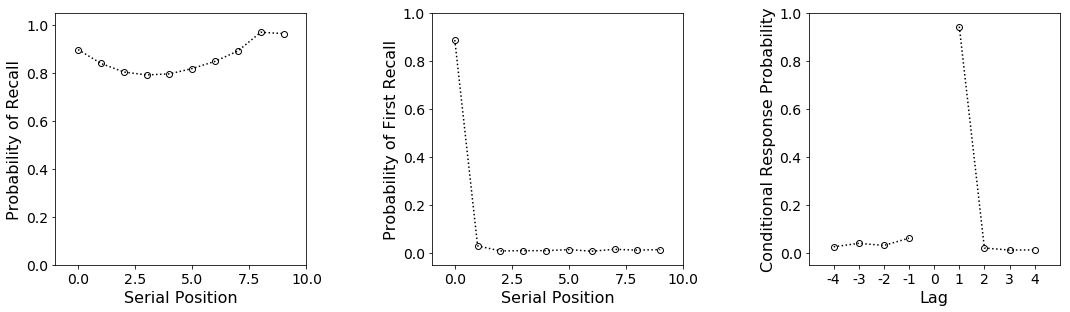

In [25]:
optimizer = load_model.load_reminder()
load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_pos0.json"]) # phi_s = 0
param = optimizer.max['params']
N, ll, lag_examine, data_id = fitpatterns.set_parameter_prob()
CMR_sp,acc = fitpatterns.obj_func_prob_reminder(param['beta_enc'],param['beta_rec'],param['gamma_fc'],0)
CMR_spc,CMR_pfr = fitpatterns.get_spc_pfr(CMR_sp,ll)
CMR_crp = fitpatterns.get_crp(CMR_sp,4,ll)
data_spc, data_pfr, data_crp = fitpatterns.load_patterns(data_id)
plotting.plot_simulations(CMR_spc,CMR_pfr,CMR_crp,ll,'figure3_optimalpolicy.png') 

### Figure 4. With noises added - A rational account of Drifting

left:  python3 script_reminder_noise.py --pos 10 --k 5 --enc i (i ranges 75 to 100)

right: python3 script_reminder_noise.py --pos 10 --k i --enc 100 (i ranges from 1 to 5)

{'beta_enc': 0.7891619417176348, 'k': 5.0, 'gamma_fc': 0.0, 'enc_rate': 0.75, 'cue_position': 0.0, 'beta_rec': 0.9068983926302929}
{'beta_enc': 0.6606008916526697, 'k': 1.0, 'gamma_fc': 0.0, 'enc_rate': 1.0, 'cue_position': 0.0, 'beta_rec': 0.5434223157398115}


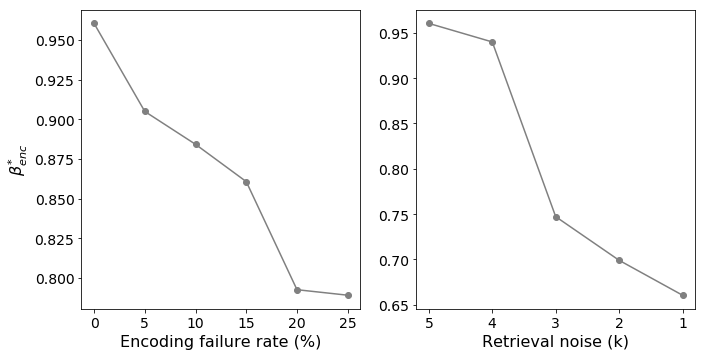

In [26]:
### 
# Result 3: The effect of encoding noises
###
plt.rcParams['figure.figsize'] = (11,5.5)
beta_encs = []
plt.subplot(1,2,1)
encs = [100,95,90,85,80,75]
names = [str(100-x) for x in encs]
for enc in encs:
    optimizer = load_model.load_reminder_noise()
    load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_pos0_k5_enc"+str(enc)+".json"]) # phi_s = 0
    param = optimizer.max['params']
    beta_encs.append(optimizer.max['params']['beta_enc'])

plt.xticks(range(len(encs)), (names))
plt.plot(beta_encs,'-o',c='grey')
plt.xlabel('Encoding failure rate (%)')
plt.ylabel(r'$\beta_{enc}^{*}$')
print(param)
plt.subplot(1,2,2)
beta_encs = []
ks = [5,4,3,2,1]
names = [str(x) for x in ks]
for k in ks:
    optimizer = load_model.load_reminder_noise()
    load_logs(optimizer, logs=["./output/logs1001_fitCMRprob_K02Behav_poi02_pos0_k"+str(k)+"_enc100.json"]) # phi_s = 0
    param = optimizer.max['params']
    beta_encs.append(optimizer.max['params']['beta_enc']) 
print(param)    
plt.xticks(range(len(ks)), (names))
plt.plot(beta_encs,'-o',c='grey')
plt.xlabel('Retrieval noise (k)')
#plt.ylabel(r'$\beta_{enc}^{*}$')
plt.savefig('./Figs/figure4_noise.png') 
set_figure(14,14)
plt.show()


### Figure 5. Considering the constraint of not being able to have primacy all the time - A rational account of Contiguity 

In [27]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   
def obtain_policy(bins,xs,ys,zs,target,ll):
    bin_size = 1/bins
    bins_values = []
    parameters = []
    for i in range(bins):
        low = i*bin_size
        high = (i+1)*bin_size
        values = []
        values_x = []
        values_y = []
        values_z = []
        for j,x in enumerate(target):
            if low < xs[j] < high:
                values.append(x)
                values_x.append(xs[j])
                values_y.append(ys[j])
                values_z.append(zs[j])
        index = np.argmax(values)
        bins_values.append(np.max(values)/ll)
        parameters.append([values_x[index],values_y[index],values_z[index]])
    return bins_values,parameters    

A total of 11 simulations:
python3 script_reminder_noise.py --pos i --k 3 --enc 100 (i = 0,1,2..10); 

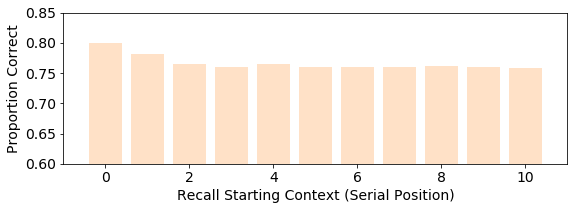

In [28]:
### 
# Result 1: Starting from the beginning gives best recall
###
plt.rcParams['figure.figsize'] = (10,3)
performance1 = []
ll = 10
for pos in range(ll+1):
    optimizer = load_model.load_reminder_noise()
    load_logs(optimizer, logs=["./output/logs0407_fitCMRprob_K02Behav_poi02_pos"+str(pos)+"_k3_enc100.json"]) # phi_s = 0
    param = optimizer.max['params']
    performance1.append(optimizer.max['target']/ll) 
#plt.axhline(y=1,linestyle='--',color='r',xmin=0,xmax=10,alpha=0.8)
plt.bar(range(ll+1),performance1,color='peachpuff',alpha=0.8)
plt.axis([-1,11,0.6,0.85])
plt.xlabel('Recall Starting Context (Serial Position)')
plt.ylabel('Proportion Correct')
set_figure(14,14)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
plt.savefig('./Figs/figure5_A.png') 
plt.show()

A total of 20 simulations:
python3 script_reminder_noise.py --pos i --k 3 --enc 100 (i = 0 or 10);
set beta_enc (0.1*j,0.1*j) in script_reminder_noise.py (j=0,1,2,..10)  

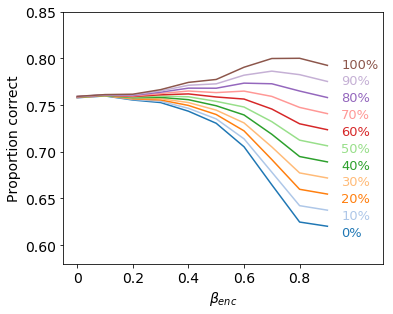

In [29]:
ll=10
plt.rcParams['figure.figsize'] = (6,5)
targets = [[],[]]
gammas = [[],[]]
betas = [[],[]]
for pos in range(2):
    for b in range(10):
        optimizer = load_model.load_reminder_noise()
        #if pos==0 and b<10 and b>4:
        #    load_logs(optimizer, logs=["./output/logs0312_fitCMRprob_K02Behav_poi02_beta"+str(b*10)+"_pos"+str(pos*10)+"_k3_enc100.json"]) # phi_s = 0
        #else:
        load_logs(optimizer, logs=["./output/logs0311_fitCMRprob_K02Behav_poi02_beta"+str(b*10)+"_pos"+str(pos*10)+"_k3_enc100.json"]) # phi_s = 0
       
        param = optimizer.max['params']
        #print(len(optimizer.res))
        targets[pos].append(optimizer.max['target']/10)
        gammas[pos].append(param['gamma_fc'])
        betas[pos].append(param['beta_rec'])
temp=[]
labels = [str(x*10)+'%' for x in range(11)]
for i in range(11):
    temp.append(np.multiply(i/10,targets[0])+np.multiply(1-i/10,targets[1]))
for i in range(11):
    plt.text(9.5, 0.61+0.018*i, labels[i], fontsize=13, color=tableau20[i])
    plt.plot(temp[i],color=tableau20[i])
    plt.xticks([0,2,4,6,8], ['0','0.2','0.4','0.6','0.8'])
    plt.xlabel(r'$\beta_{enc}$')
    plt.ylabel('Proportion correct')
    plt.axis([-0.5,11,0.58,0.85])
    plt = set_figure(14,16)
plt.subplots_adjust(left=0.16, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
#plt.savefig('./Figs/figure5_proportion_k3.png') 

#plt.show()
#plt.axis([0,12,0.5,0.9])
#for i in range(2):
#    plt.plot(gammas[i])
#plt.show()

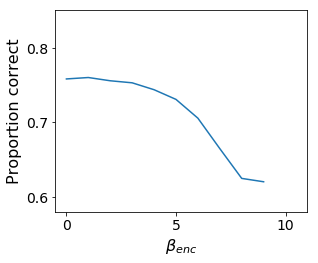

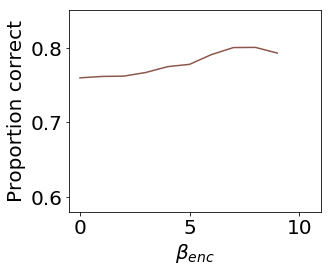

In [30]:
positions = [0,10]
for pos in positions:
    plt.rcParams['figure.figsize'] = (5,4)
    plt.plot(temp[pos],color=tableau20[pos])
    plt.xlabel(r'$\beta_{enc}$')
    plt.ylabel('Proportion correct')
    plt.axis([-0.5,11,0.58,0.85])
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
    plt = set_figure(20,20)
    if pos==0:
        plt.savefig('./Figs/figure5_pos0_noise.png') 
    else:
        plt.savefig('./Figs/figure5_pos10_noise.png')
    plt.show()  

beta_enc - 0.6

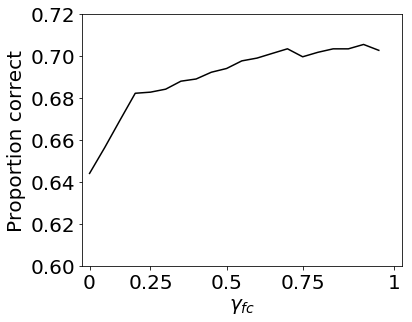

In [31]:
plt.rcParams['figure.figsize'] = (6,5)
optimizer = load_model.load_reminder_noise()
load_logs(optimizer, logs=["./output/logs0311_fitCMRprob_K02Behav_poi02_beta60_pos10_k3_enc100.json"]) # phi_s = 0
xs = np.array([res["params"]["gamma_fc"] for res in optimizer.res])       
ys = np.array([res["params"]["beta_enc"] for res in optimizer.res])
zs = np.array([res["params"]["beta_rec"] for res in optimizer.res])
target = np.array([res["target"] for res in optimizer.res])
bins=20
ll=10
bins_values,_ = obtain_policy(bins,xs,ys,zs,target,ll)
#sc = plt.scatter(xs, target,c=target,cmap='summer',alpha=0.6,s=15)#, vmin=3, vmax=7)#, s=35)
plt.plot(bins_values,'-k')
plt.axis([-0.5,20.5,0.6,0.72])
plt.xticks([0,4,9,14,20], ['0','0.25','0.5','0.75','1'])
plt.xlabel(r'$\gamma_{fc}$')
plt.ylabel('Proportion correct')
plt = set_figure(14,16)
plt.subplots_adjust(left=0.16, bottom=0.2, right=0.9, top=0.9, wspace=0.5, hspace=0.5)  
plt.savefig('./Figs/figure5_E.png') 
plt.show()